In [ ]:
!python -m pip install scikit-image;
!python -m pip install numpy;
!python -m pip install pillow;
!python -m pip install opencv-python;
!python -m pip install scikit-learn;


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Archives**, Added code below to ensure that even when moved to a seperate notebook, the code will still run.

This code isn't really maintained so it may not work with the latest location in which it's put. **This code should be removed before being added to the paper or presentaiton**

In [ ]:
import sys
import os
import requests
from io import BytesIO

from skimage.feature import graycomatrix, graycoprops
import numpy as np
from PIL import Image

sys.path.append(os.path.abspath("../"))  # Adjust as needed


In [ ]:


def calculate_glcm_contrast(image_path):
    """Calculates the contrast feature of the GLCM for a given image (local path or URL)."""
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        contrast = graycoprops(glcm, 'contrast')[0, 0]
        return contrast

    except Exception as e:
        print(f"Error: {e}")
        return None

In [ ]:
# Example Usage
#image_url = 'https://i.postimg.cc/dVn8QQVx/Whats-App-Image-2025-03-01-at-5-41-25-PM.jpg' #original link was temporary, no more works -- this can be demonstrated using any image within the common directory though
image_url = 'closeup_sandpaper.jpg' 
contrast_value = calculate_glcm_contrast(image_url)

if contrast_value is not None:
    print(f"GLCM Contrast: {contrast_value}")

GLCM Contrast: 180.17513687150839


Illustrated below is the 'fast_glcm()' method taken from a GitHub [repo](https://github.com/tzm030329/GLCM/blob/master/fast_glcm.py). It is from this repository that the original Gray-Level Co-Occurance Matrix code was based. 

In [ ]:

import cv2
def fast_glcm(img, vmin=0, vmax=255, nbit=8, kernel_size=5):
    mi, ma = vmin, vmax
    ks = kernel_size
    h,w = img.shape

    # digitize
    bins = np.linspace(mi, ma+1, nbit+1)
    gl1 = np.digitize(img, bins) - 1
    print(f"{gl1} After digitize #1")
    gl2 = np.append(gl1[:,1:], gl1[:,-1:], axis=1)

    print(f"{gl2} After digitize #2")
    # make glcm
    glcm = np.zeros((nbit, nbit, h, w), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            mask = ((gl1==i) & (gl2==j))
            glcm[i,j, mask] = 1

    kernel = np.ones((ks, ks), dtype=np.uint8)
    for i in range(nbit):
        for j in range(nbit):
            glcm[i,j] = cv2.filter2D(glcm[i,j], -1, kernel)

    glcm = glcm.astype(np.float32)
    return glcm

print(fast_glcm(np.array([[2,3,4,6,7],[3,5,82,34,2], [ 2, 3, 7, 5, 8] ,  [15, 71, 23, 45, 67] , [ 2, 56, 7, 89, 1 ]]), vmin=2, vmax=83, nbit=10, kernel_size=3))

[[ 0  0  0  0  0]
 [ 0  0  9  3  0]
 [ 0  0  0  0  0]
 [ 1  8  2  5  7]
 [ 0  6  0 10 -1]] After digitize #1
[[ 0  0  0  0  0]
 [ 0  9  3  0  0]
 [ 0  0  0  0  0]
 [ 8  2  5  7  7]
 [ 6  0 10 -1 -1]] After digitize #2
[[[[5. 5. 3. 5. 5.]
   [7. 7. 6. 7. 7.]
   [4. 4. 3. 4. 4.]
   [3. 3. 3. 3. 3.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[4. 2. 2. 0. 0.]
   [2. 1. 1. 0. 0.]
   [2. 1. 1. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]]


 [[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]

## Figures used at UIC BioDesign Symposium
    Depicted below are the figures used at the UIC biodesign symposium made within an incredibly short amount of time and honestly lacking much of the thoroughness

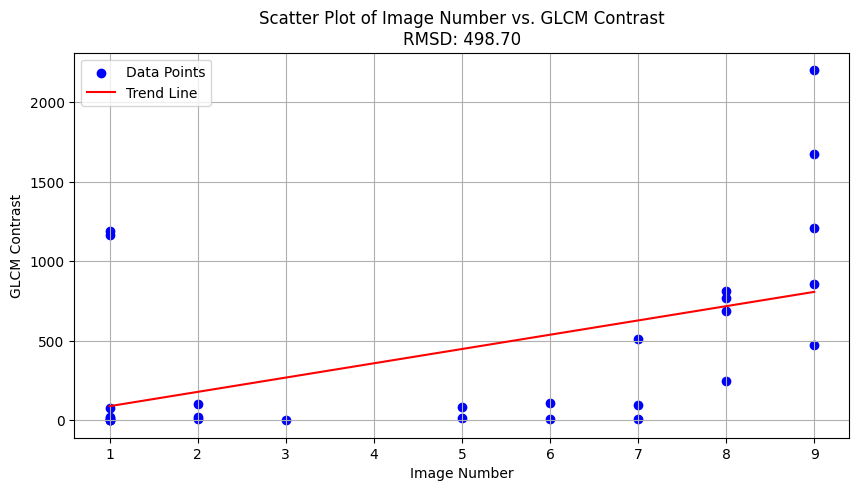

In [16]:
import numpy as np
import re
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

# Extract the number from the filenames
image_numbers = [int(re.search(r'(\d+)(?!\))', filename).group(1)) for filename in filenames]

# Convert to numpy arrays for linear regression
image_numbers_np = np.array(image_numbers).reshape(-1, 1)
contrast_values_np = np.array(contrast_values)

# Perform linear regression
model = LinearRegression()
model.fit(image_numbers_np, contrast_values_np)
trend_line = model.predict(image_numbers_np)

# Calculate RMSD
rmsd = np.sqrt(np.mean((contrast_values_np - trend_line) ** 2))

# Create the scatter plot with trend line
plt.figure(figsize=(10, 5))
plt.scatter(image_numbers, contrast_values, color='blue', label='Data Points')
plt.plot(image_numbers, trend_line, color='red', label='Trend Line')
plt.xlabel('Image Number')
plt.ylabel('GLCM Contrast')
plt.title(f'Scatter Plot of Image Number vs. GLCM Contrast\nRMSD: {rmsd:.2f}')
plt.legend()
plt.grid(True)
plt.show()

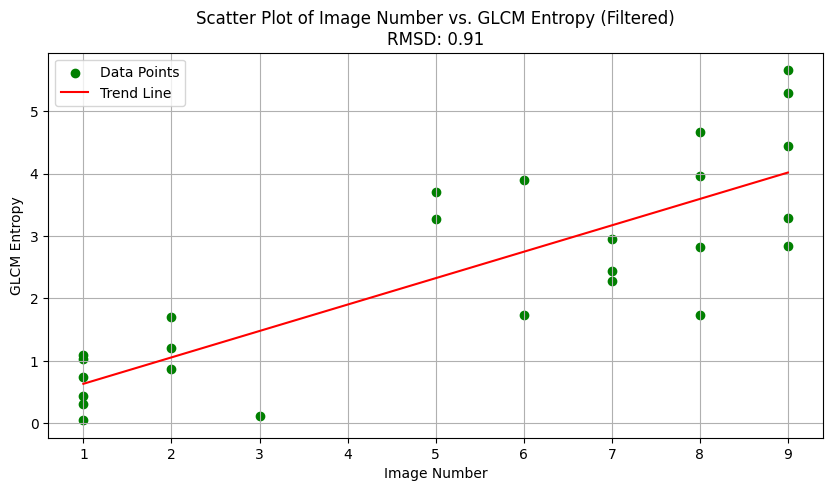

In [24]:
from skimage.measure import shannon_entropy

def calculate_glcm_entropy(image_path):
    """Calculates the entropy feature of the GLCM for a given image (local path or URL)."""
    try:
        # Check if the path is a URL
        if image_path.startswith(('http://', 'https://')):
            # Download the image from the URL
            response = requests.get(image_path)
            response.raise_for_status()  # Raise error for bad status codes
            img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
        else:
            # Open local image
            img = Image.open(image_path).convert('L')

        image_array = np.array(img)
        glcm = graycomatrix(image_array, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
        entropy = shannon_entropy(glcm)
        return entropy

    except Exception as e:
        print(f"Error: {e}")
        return None

# Calculate entropy for each image
entropy_results = []
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_dir, filename)
        entropy_value = calculate_glcm_entropy(image_path)
        if entropy_value is not None:
            entropy_results.append((filename, entropy_value))

# Sort results by filename
entropy_results.sort(key=lambda x: x[0])

# Separate filenames and entropy values
entropy_filenames, entropy_values = zip(*entropy_results)

# Extract the number from the filenames
entropy_image_numbers = [int(re.search(r'(\d+)(?!\))', filename).group(1)) for filename in entropy_filenames]

# Filter out entries with image number 1 and entropy value over 2
filtered_indices = ~((np.array(entropy_image_numbers) == 1) & (np.array(entropy_values) > 2))

# Apply the filter to image numbers and entropy values
filtered_entropy_image_numbers_np = np.array(entropy_image_numbers)[filtered_indices].reshape(-1, 1)
filtered_entropy_values_np = np.array(entropy_values)[filtered_indices]

# Perform linear regression on filtered data
entropy_model = LinearRegression()
entropy_model.fit(filtered_entropy_image_numbers_np, filtered_entropy_values_np)
entropy_trend_line = entropy_model.predict(filtered_entropy_image_numbers_np)

# Calculate RMSD
entropy_rmsd = np.sqrt(np.mean((filtered_entropy_values_np - entropy_trend_line) ** 2))

# Create the scatter plot with trend line
plt.figure(figsize=(10, 5))
plt.scatter(filtered_entropy_image_numbers_np, filtered_entropy_values_np, color='green', label='Data Points')
plt.plot(filtered_entropy_image_numbers_np, entropy_trend_line, color='red', label='Trend Line')
plt.xlabel('Image Number')
plt.ylabel('GLCM Entropy')
plt.title(f'Scatter Plot of Image Number vs. GLCM Entropy (Filtered)\nRMSD: {entropy_rmsd:.2f}')
plt.legend()
plt.grid(True)
plt.show()